### Import Libraries

In [1]:
# Manipulation Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

> **Note**: temperature change is with respect to a baseline climatology, corresponding to the period 1951–1980 (as said within [the documentation](https://www.fao.org/faostat/en/#data/ET)).

## I. Load & Explore the Data

In [2]:
# Import the data
temp = pd.read_csv("temperature_change_data_11-29-2021.csv")
temp.columns

Index(['Domain Code', 'Domain', 'Area Code (ISO3)', 'Area', 'Element Code',
       'Element', 'Months Code', 'Months', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description'],
      dtype='object')

In [3]:
temp.head()

,Domain Code,Domain,Area Code (ISO3),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1961,1961,°C,-0.751,Fc,Calculated data
1,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1962,1962,°C,0.985,Fc,Calculated data
2,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1963,1963,°C,1.931,Fc,Calculated data
3,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1964,1964,°C,-2.056,Fc,Calculated data
4,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1965,1965,°C,-0.669,Fc,Calculated data


In [4]:
temp.describe()

,Element Code,Months Code,Year Code,Year,Value
count,67625.0,67625.000000,67625.000000,67625.000000,65331.000000
mean,7271.0,7018.000000,1991.306248,1991.306248,0.491524
std,0.0,1.414224,17.333343,17.333343,0.820116
min,7271.0,7016.000000,1961.000000,1961.000000,-5.979000
25%,7271.0,7017.000000,1976.000000,1976.000000,-0.011000
50%,7271.0,7018.000000,1992.000000,1992.000000,0.410000
75%,7271.0,7019.000000,2006.000000,2006.000000,0.932000
max,7271.0,7020.000000,2020.000000,2020.000000,8.206000


In [5]:
temp['Flag Description'].value_counts()

Calculated data       65331
Data not available     2294
Name: Flag Description, dtype: int64

In [6]:
temp['Months'].value_counts()

Dec–Jan–Feb            13525
Mar–Apr–May            13525
Jun–Jul–Aug            13525
Sep–Oct–Nov            13525
Meteorological year    13525
Name: Months, dtype: int64

## II. Prepare the Data

In [7]:
# Countries to keep
areas_to_keep = ['Serbia', "Japan", "United States of America","Egypt"]

# Filter the data
evolution = temp[(temp["Flag Description"] != "Data Not Available") & 
                 (temp["Months"] == "Meteorological year") & 
                 (temp["Area"].isin(areas_to_keep))].reset_index(drop=True)

# Rename some Areas
evolution["Area"] = evolution["Area"].replace(to_replace=["United States of America"],
                                             value=["United States"])

# Group by Area and Year
evolution = evolution.groupby(["Area", "Year"])["Value"].mean().reset_index()

# Look into the dataframe
evolution.head()

,Area,Year,Value
0,Egypt,1961,-0.258
1,Egypt,1962,0.634
2,Egypt,1963,0.638
3,Egypt,1964,-0.367
4,Egypt,1965,-0.077


## III. Create the Lineplot V1 (Basic Visual)

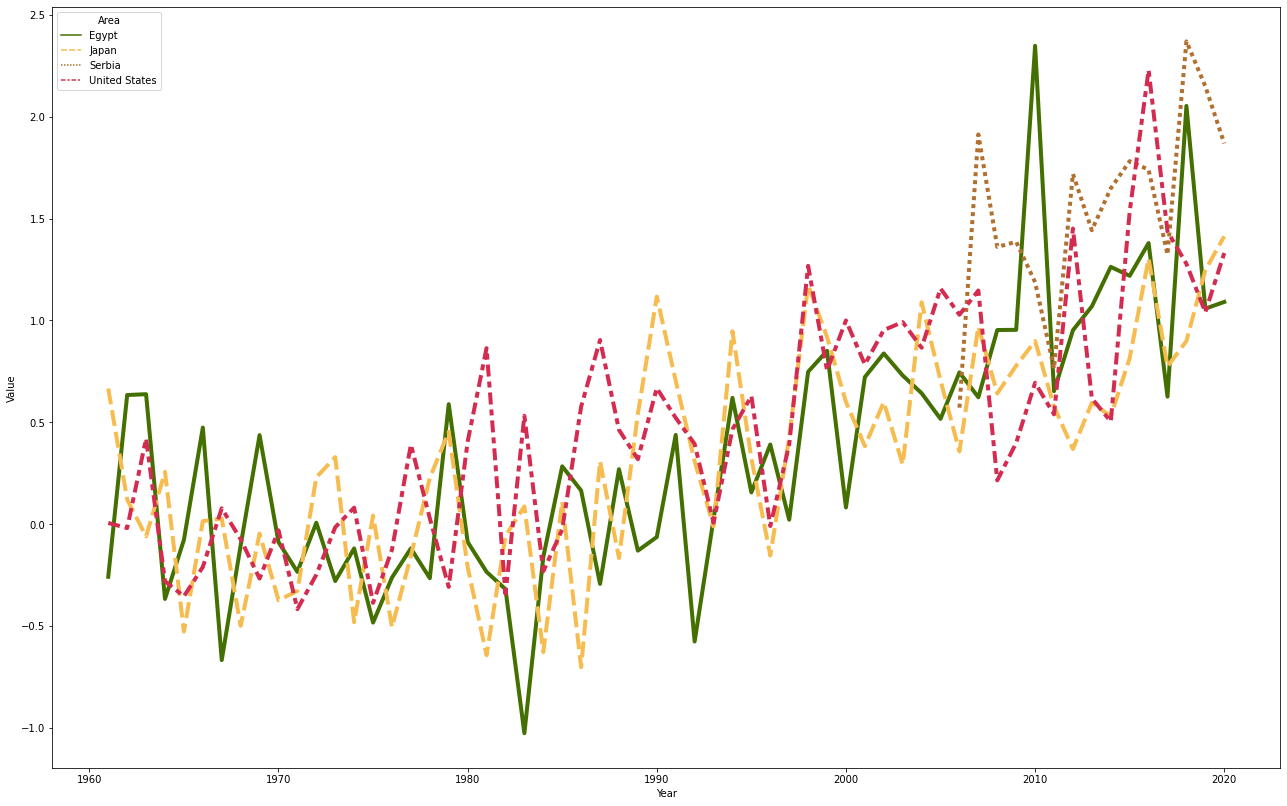

In [8]:
# Set the general figure size
plt.figure(figsize=(22, 14))

# Plot the initial linechart
line = sns.lineplot(data=evolution, x="Year", y="Value",
                    hue="Area", style="Area", lw=4,
                    palette=["#437000", "#F7BC50", "#B1702F","#d42c51"])


## III. Create the Lineplot V2 (Add Title, Axes)

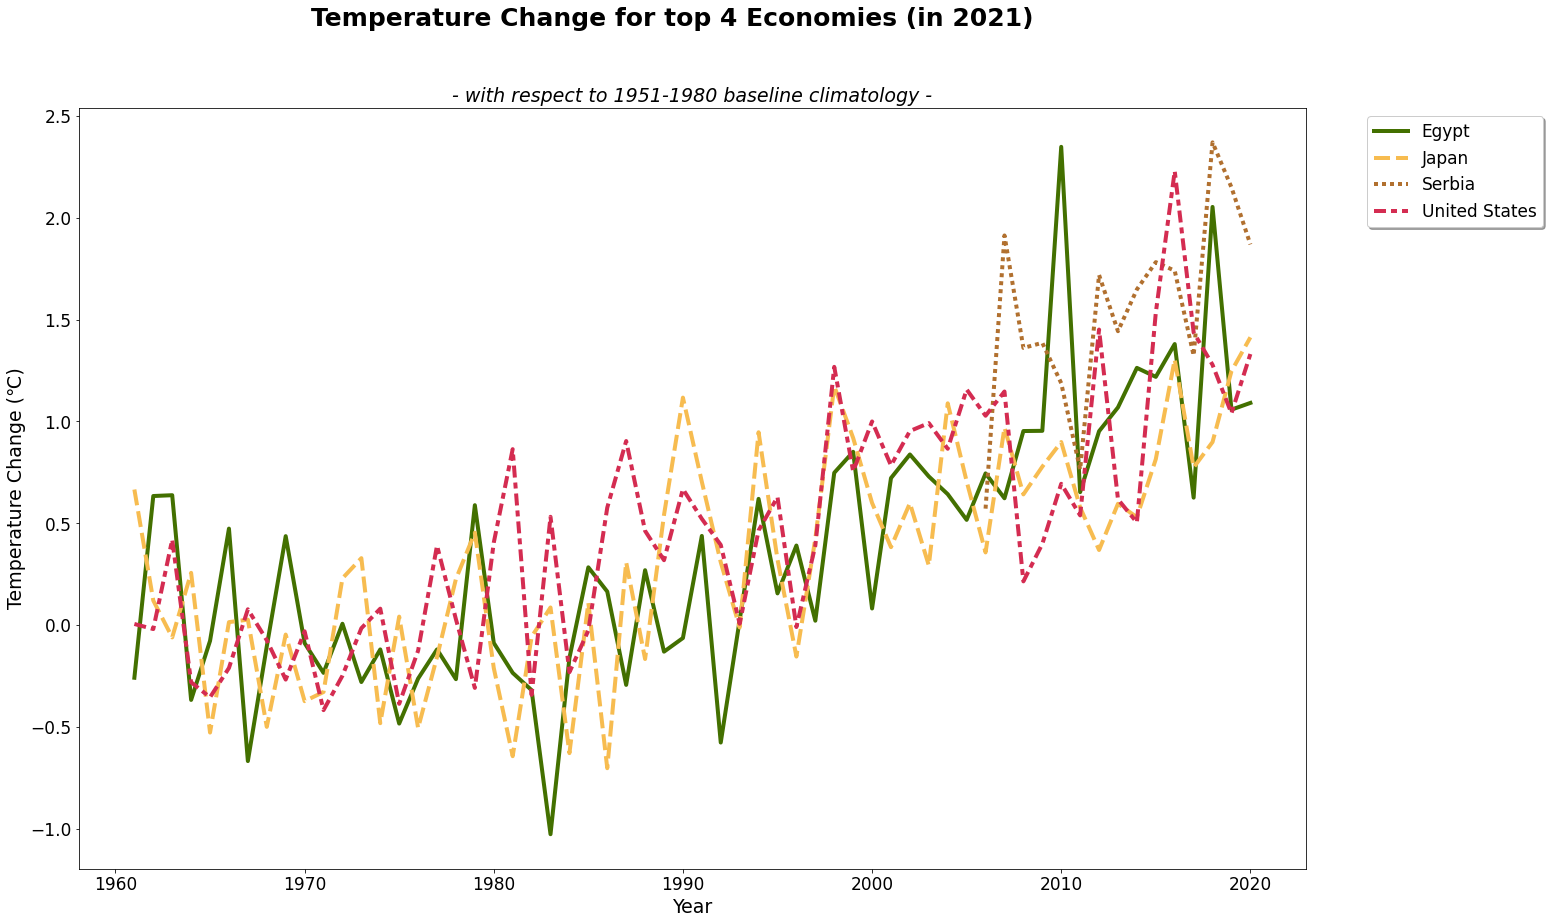

In [9]:
# Set the general figure size
plt.figure(figsize=(22, 14))

# Plot the initial linechart
line = sns.lineplot(data=evolution, x="Year", y="Value",
                    hue="Area", style="Area", lw=4,
                    palette=["#437000", "#F7BC50", "#B1702F","#d42c51"])

# Add a general title
plt.suptitle("Temperature Change for top 4 Economies (in 2021)", fontsize=25, weight="bold")
plt.title("- with respect to 1951-1980 baseline climatology -", fontsize=19, style="italic")

# Format axis labels
plt.xlabel("Year", fontsize=19)
plt.ylabel("Temperature Change (℃)", fontsize=19)

# Format axis ticks
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

# Add a legend
leg = line.legend(fontsize=17, bbox_to_anchor= (1.2,1), shadow=1)
for legend_line in leg.get_lines():
    legend_line.set_linewidth(4)
    
    

## III. Create the Lineplot Final (Clean up & Annotate) 

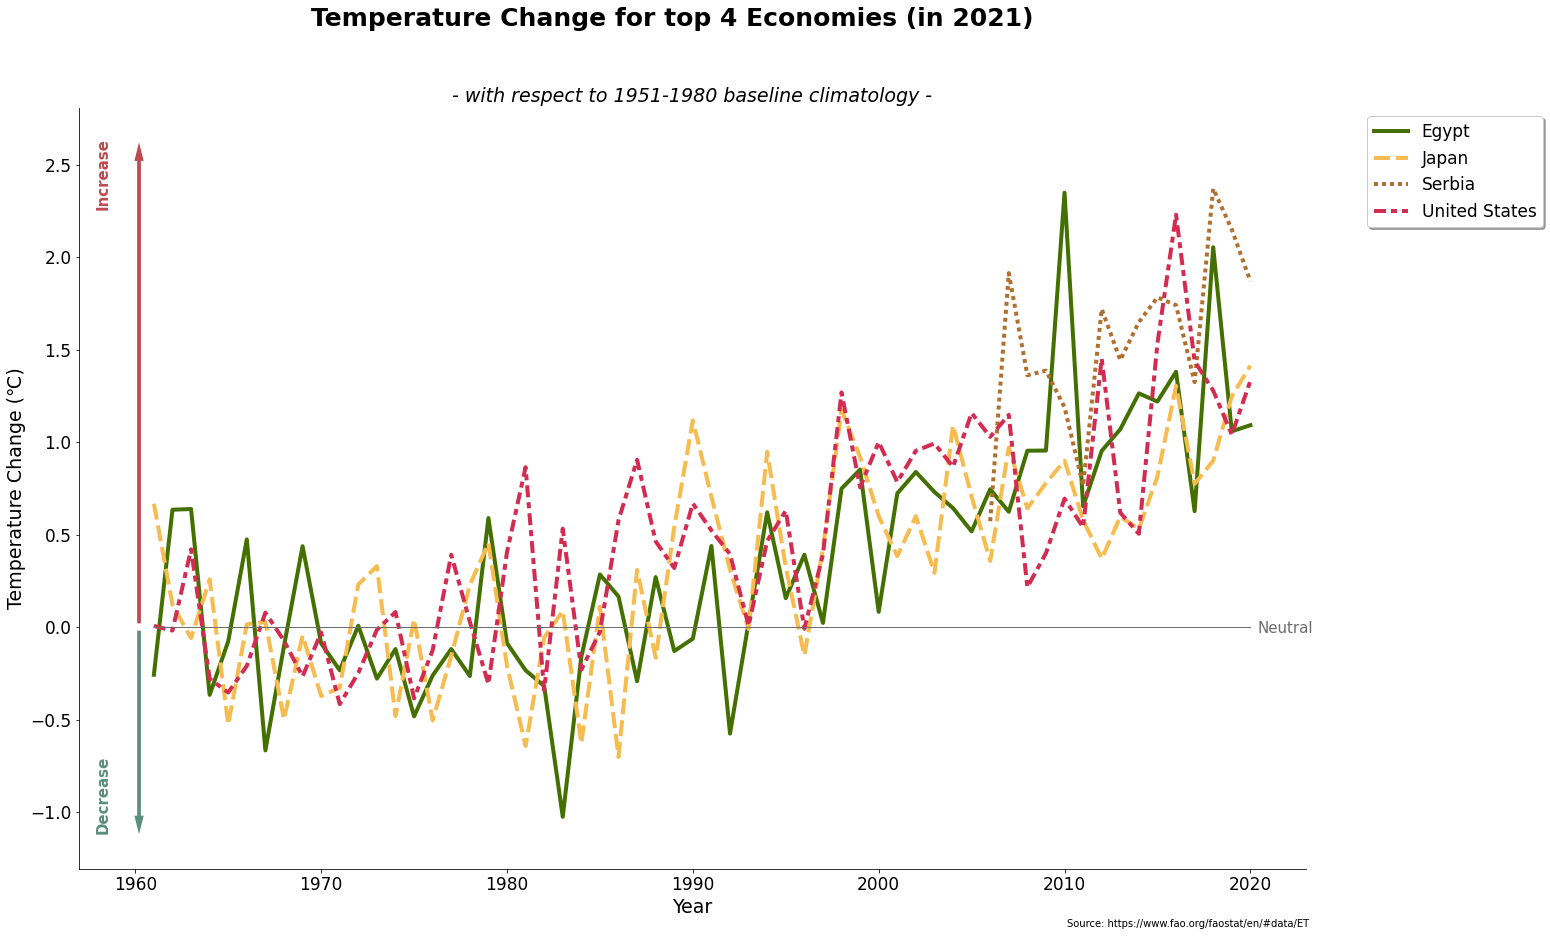

In [10]:
# Set the general figure size
plt.figure(figsize=(22, 14))

# Plot the initial linechart
line = sns.lineplot(data=evolution, x="Year", y="Value",
                    hue="Area", style="Area", lw=4,
                    palette=["#437000", "#F7BC50", "#B1702F","#d42c51"])

# Add a general title
plt.suptitle("Temperature Change for top 4 Economies (in 2021)", fontsize=25, weight="bold")
plt.title("- with respect to 1951-1980 baseline climatology -", fontsize=19, style="italic")

# Format axis labels
plt.xlabel("Year", fontsize=19)
plt.ylabel("Temperature Change (℃)", fontsize=19)

# Format axis ticks
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

# Add a legend
leg = line.legend(fontsize=17, bbox_to_anchor= (1.2,1), shadow=1)
for legend_line in leg.get_lines():
    legend_line.set_linewidth(4)

# Despinde for better readability
sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)

# Add arrows for better visualization
plt.arrow(x=1960.2, y=0.02, dx=0, dy=2.5, width=0.2, head_width=0.5, head_length=0.1,
          facecolor='#BC4B51', edgecolor='none')
plt.arrow(x=1960.2, y=-0.02, dx=0, dy=-1, width=0.2, head_width=0.5, head_length=0.1,
          facecolor='#5B8E7D', edgecolor='none')
plt.plot([1961, 2020], [0.0, 0.0], lw=1, color="#6D6D6D")

# Add text helpers
plt.text(0.014, 0.87, 'Increase', fontsize=15, color='#BC4B51', weight="bold",
         rotation="vertical", transform=line.transAxes)
plt.text(0.014, 0.05, 'Decrease', fontsize=15, color='#5B8E7D', weight="bold",
         rotation="vertical", transform=line.transAxes)
plt.text(0.96, 0.31, 'Neutral', fontsize=15, color='#6D6D6D',
         rotation="horizontal", transform=line.transAxes)

# Add source of data
plt.annotate('Source: https://www.fao.org/faostat/en/#data/ET', (0.87,0), (-80,-50), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top');

### Further Inquires:

* What are the areas with biggest/smallest change in temperature?
* Are there any correlations between the hottest changes and other phenomena (like land coverage, land fires, CO2 emissions etc.)
* How does the seasonal temperature change look like?
* How does this vary by continent? Particularly South America?

In [11]:
temp.head() # to reduce the scrolling time

,Domain Code,Domain,Area Code (ISO3),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1961,1961,°C,-0.751,Fc,Calculated data
1,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1962,1962,°C,0.985,Fc,Calculated data
2,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1963,1963,°C,1.931,Fc,Calculated data
3,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1964,1964,°C,-2.056,Fc,Calculated data
4,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1965,1965,°C,-0.669,Fc,Calculated data


In [12]:
evolution.head() # to reduce the scrolling time

,Area,Year,Value
0,Egypt,1961,-0.258
1,Egypt,1962,0.634
2,Egypt,1963,0.638
3,Egypt,1964,-0.367
4,Egypt,1965,-0.077


In [13]:
# areas with biggest/smallest change in temperature ('Svalbard and Jan Mayen Islands')
def get_biggest_change(df, col):
    return df.sort_values(by=col, ascending=False).iloc[0]["Area"]
get_biggest_change(temp, "Value")

'Svalbard and Jan Mayen Islands'

In [14]:
temp[(temp['Value']==temp['Value'].max())] # another method to get the biggest change

,Domain Code,Domain,Area Code (ISO3),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
57788,ET,Temperature change,SJM,Svalbard and Jan Mayen Islands,7271,Temperature change,7016,Dec–Jan–Feb,2014,2014,°C,8.206,Fc,Calculated data


In [15]:
#areas with the lowest temperature change
def get_lowest_temp_change(df):
    return df[df['Value']==df['Value'].min()]
get_lowest_temp_change(temp)

,Domain Code,Domain,Area Code (ISO3),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
57922,ET,Temperature change,SJM,Svalbard and Jan Mayen Islands,7271,Temperature change,7019,Sep–Oct–Nov,1968,1968,°C,-5.979,Fc,Calculated data


In [26]:
#how dose the seasonal temperature change compare to the overall temperature change
def get_seasonal_temp_change(df):
    return df[df['Year'] <= 2000]
get_seasonal_temp_change(temp)

,Domain Code,Domain,Area Code (ISO3),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1961,1961,°C,-0.751,Fc,Calculated data
1,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1962,1962,°C,0.985,Fc,Calculated data
2,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1963,1963,°C,1.931,Fc,Calculated data
3,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1964,1964,°C,-2.056,Fc,Calculated data
4,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1965,1965,°C,-0.669,Fc,Calculated data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67600,ET,Temperature change,ZWE,Zimbabwe,7271,Temperature change,7020,Meteorological year,1996,1996,°C,-0.200,Fc,Calculated data
67601,ET,Temperature change,ZWE,Zimbabwe,7271,Temperature change,7020,Meteorological year,1997,1997,°C,0.117,Fc,Calculated data
67602,ET,Temperature change,ZWE,Zimbabwe,7271,Temperature change,7020,Meteorological year,1998,1998,°C,0.932,Fc,Calculated data
67603,ET,Temperature change,ZWE,Zimbabwe,7271,Temperature change,7020,Meteorological year,1999,1999,°C,0.167,Fc,Calculated data


In [27]:
#are there any correlations between the temperature change and the area?
def get_correlation(df):
    return df.corr()
get_correlation(temp)


,Element Code,Months Code,Year Code,Year,Value
Element Code,NaN,NaN,NaN,NaN,NaN
Months Code,NaN,1.000000e+00,-7.977939e-14,-7.977939e-14,-0.006194
Year Code,NaN,-7.977939e-14,1.000000e+00,1.000000e+00,0.546124
Year,NaN,-7.977939e-14,1.000000e+00,1.000000e+00,0.546124
Value,NaN,-6.193737e-03,5.461242e-01,5.461242e-01,1.000000


In [31]:
#How does this vary by continent?
def get_continent(df):
    return df.groupby(["Area", "Year"])["Value"].mean().reset_index()
get_continent(temp)

,Area,Year,Value
0,Afghanistan,1961,-0.1208
1,Afghanistan,1962,-0.1714
2,Afghanistan,1963,0.8408
3,Afghanistan,1964,-0.7792
4,Afghanistan,1965,-0.2538
...,...,...,...
13520,Zimbabwe,2016,1.4698
13521,Zimbabwe,2017,0.4432
13522,Zimbabwe,2018,0.7466
13523,Zimbabwe,2019,1.3590
